<a href="https://colab.research.google.com/github/MohammedRSaad/Osteoporosis-indecator/blob/main/Copy_of_MLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics

# **Importing the data**

#### **Connecting Google Colab with Google Drive to get the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **NHANES 2011-2012 data:** **bold text**

In [ ]:
body_measures_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/BMX_G.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_Q_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/BPQ_G.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_X_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/BPX_G.csv").drop_duplicates(subset=['SEQN'])
demographic_data_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/DEMO_G.csv").drop_duplicates(subset=['SEQN'])
diabetes_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/DIQ_G.csv").drop_duplicates(subset=['SEQN'])
kidney_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/KIQ_U_G.csv").drop_duplicates(subset=['SEQN'])
muscle_strength_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/MGX_G.csv").drop_duplicates(subset=['SEQN'])
bone_prameters_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/DXX_G.csv").drop_duplicates(subset=['SEQN'])

#### **NHANES 2013-2012 data:**

In [ ]:
body_measures_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/BMX_H.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_Q_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/BPQ_H.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_X_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/BPX_H.csv").drop_duplicates(subset=['SEQN'])
demographic_data_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/DEMO_H.csv").drop_duplicates(subset=['SEQN'])
diabetes_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/DIQ_H.csv").drop_duplicates(subset=['SEQN'])
kidney_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/KIQ_U_H.csv").drop_duplicates(subset=['SEQN'])
muscle_strength_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/MGX_H.csv").drop_duplicates(subset=['SEQN'])
bone_prameters_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/DXX_H.csv").drop_duplicates(subset=['SEQN'])

# **Data Cleaning** 

#### **Merging data**

In [ ]:
datasets_11 = [body_measures_11, blood_pressure_Q_11, blood_pressure_X_11, demographic_data_11, diabetes_11, kidney_11, muscle_strength_11, bone_prameters_11]
df_11 = pd.concat([df.set_index(['SEQN']) for df in datasets_11], axis=1)
df_11.reset_index(inplace=True)
df_11

,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,62161,69.2,172.3,23.3,2.0,2.0,1.0,596.0,1,22,...,1.0,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213
1,62162,12.7,94.7,14.2,NaN,NaN,1.0,64.0,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163,49.4,168.9,17.3,NaN,NaN,1.0,788.0,1,14,...,1.0,29.4,1.0,71.0,129.83,0.711,145.72,0.748,1931.41,1.016
3,62164,67.2,170.1,23.2,2.0,2.0,1.0,527.0,2,44,...,1.0,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075
4,62165,69.1,159.4,27.2,NaN,NaN,1.0,468.0,2,14,...,1.0,25.0,1.0,50.5,126.29,0.668,125.20,0.658,1943.51,1.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,71912,87.8,177.3,27.9,2.0,2.0,1.0,609.0,1,40,...,1.0,44.3,1.0,93.9,236.26,0.842,238.32,0.888,2421.32,1.088
9752,71913,56.5,161.6,21.6,2.0,NaN,1.0,609.0,2,18,...,1.0,29.1,1.0,59.0,144.29,0.696,157.22,0.753,1976.22,1.053
9753,71914,32.3,148.1,14.7,NaN,NaN,1.0,633.0,2,10,...,1.0,18.5,1.0,37.0,85.93,0.560,84.59,0.566,1218.31,0.799
9754,71915,78.4,168.8,27.5,2.0,1.0,1.0,1058.0,1,60,...,1.0,22.0,1.0,55.5,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datasets_13 = [body_measures_13, blood_pressure_Q_13, blood_pressure_X_13, demographic_data_13, diabetes_13, kidney_13, muscle_strength_13, bone_prameters_13]
df_13 = pd.concat([df.set_index(['SEQN']) for df in datasets_13], axis=1)
df_13.reset_index(inplace=True)
df_13

,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,73557.0,78.3,171.3,26.7,1.0,1.0,1.0,620.0,1.0,69.0,...,1.0,33.4,1.0,55.2,NaN,NaN,NaN,NaN,NaN,NaN
1,73558.0,89.5,176.8,28.6,1.0,1.0,1.0,766.0,1.0,54.0,...,1.0,22.5,1.0,61.5,198.48,0.800,213.60,0.816,2276.24,1.024
2,73559.0,88.9,175.3,28.9,1.0,1.0,1.0,665.0,1.0,72.0,...,1.0,46.9,1.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN
3,73560.0,32.2,137.3,17.1,NaN,NaN,1.0,803.0,1.0,9.0,...,1.0,17.9,1.0,32.2,56.28,0.554,62.14,0.610,1127.39,0.856
4,73561.0,52.0,162.4,19.7,1.0,2.0,1.0,949.0,2.0,73.0,...,1.0,17.8,1.0,30.9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,83728.0,11.3,84.4,15.9,NaN,NaN,1.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83729.0,89.6,162.3,34.0,2.0,2.0,1.0,679.0,NaN,NaN,...,1.0,20.0,1.0,46.6,140.19,0.697,162.25,0.713,2112.83,1.110
10173,83730.0,22.8,119.1,16.1,NaN,NaN,1.0,381.0,NaN,NaN,...,1.0,8.4,1.0,20.8,NaN,NaN,NaN,NaN,NaN,NaN
10174,83731.0,42.3,148.1,19.3,NaN,NaN,1.0,498.0,NaN,NaN,...,1.0,19.5,1.0,36.0,80.89,0.610,81.89,0.606,1265.84,0.906


In [ ]:
df = pd.concat([df_11, df_13]).reset_index(drop=True)
df

,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,62161.0,69.2,172.3,23.3,2.0,2.0,1.0,596.0,1.0,22.0,...,1.0,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213
1,62162.0,12.7,94.7,14.2,NaN,NaN,1.0,64.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,49.4,168.9,17.3,NaN,NaN,1.0,788.0,1.0,14.0,...,1.0,29.4,1.0,71.0,129.83,0.711,145.72,0.748,1931.41,1.016
3,62164.0,67.2,170.1,23.2,2.0,2.0,1.0,527.0,2.0,44.0,...,1.0,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075
4,62165.0,69.1,159.4,27.2,NaN,NaN,1.0,468.0,2.0,14.0,...,1.0,25.0,1.0,50.5,126.29,0.668,125.20,0.658,1943.51,1.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19927,83728.0,11.3,84.4,15.9,NaN,NaN,1.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19928,83729.0,89.6,162.3,34.0,2.0,2.0,1.0,679.0,NaN,NaN,...,1.0,20.0,1.0,46.6,140.19,0.697,162.25,0.713,2112.83,1.110
19929,83730.0,22.8,119.1,16.1,NaN,NaN,1.0,381.0,NaN,NaN,...,1.0,8.4,1.0,20.8,NaN,NaN,NaN,NaN,NaN,NaN
19930,83731.0,42.3,148.1,19.3,NaN,NaN,1.0,498.0,NaN,NaN,...,1.0,19.5,1.0,36.0,80.89,0.610,81.89,0.606,1265.84,0.906


#### **Data cleaning**

In [ ]:
df.dropna(inplace=True)
df = df[df['RIDAGEYR'] > 15]
df.reset_index(inplace=True, drop=True)
df

,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,62161.0,69.2,172.3,23.3,2.0,2.0,1.0,596.0,1.0,22.0,...,1.0,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213
1,62164.0,67.2,170.1,23.2,2.0,2.0,1.0,527.0,2.0,44.0,...,1.0,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075
2,62169.0,54.6,164.8,20.1,2.0,2.0,1.0,1005.0,1.0,21.0,...,1.0,35.7,1.0,86.5,151.45,0.782,171.93,0.812,2024.57,1.091
3,62172.0,98.6,172.0,33.3,2.0,2.0,1.0,515.0,2.0,43.0,...,1.0,35.2,1.0,69.6,189.26,0.723,199.91,0.715,2460.49,1.065
4,62179.0,91.4,182.1,27.6,2.0,2.0,1.0,815.0,1.0,55.0,...,1.0,52.9,1.0,115.4,234.46,0.804,241.37,0.827,2682.80,1.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,83540.0,74.0,166.0,26.9,2.0,2.0,1.0,610.0,1.0,30.0,...,1.0,16.3,1.0,36.1,198.30,0.861,213.45,0.897,2716.18,1.284
5339,83541.0,72.1,163.1,27.1,2.0,2.0,1.0,886.0,1.0,44.0,...,1.0,25.4,1.0,62.9,189.69,0.855,207.89,0.900,2532.22,1.275
5340,83546.0,90.7,185.5,26.4,2.0,2.0,1.0,644.0,1.0,59.0,...,1.0,50.6,1.0,106.6,241.94,0.909,272.40,0.933,3380.93,1.369
5341,83554.0,89.3,169.0,31.3,2.0,2.0,1.0,699.0,1.0,49.0,...,1.0,35.3,1.0,74.2,225.08,0.871,236.01,0.902,2889.10,1.296


# **Data Analysis** 

#### **Data report**

In [ ]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("your_report.html")

In [ ]:
#profile

#### **Creating new column for having ostoeporosis**

In [ ]:
BMD_mean = df['DXXLABMD'].mean()
print(f'mean: {BMD_mean}')
BMD_std = df['DXXLABMD'].std()
print(f'std: {BMD_std}')

have_disease = pd.DataFrame(((df['DXXLABMD'] - BMD_mean)/ BMD_std < -1).tolist(), columns=['have_disease'])
df = pd.concat([df, have_disease], axis=1)
df

mean: 0.7760902114916712
std: 0.09596875907148193


,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD,have_disease
0,62161.0,69.2,172.3,23.3,2.0,2.0,1.0,596.0,1.0,22.0,...,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213,False
1,62164.0,67.2,170.1,23.2,2.0,2.0,1.0,527.0,2.0,44.0,...,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075,True
2,62169.0,54.6,164.8,20.1,2.0,2.0,1.0,1005.0,1.0,21.0,...,35.7,1.0,86.5,151.45,0.782,171.93,0.812,2024.57,1.091,False
3,62172.0,98.6,172.0,33.3,2.0,2.0,1.0,515.0,2.0,43.0,...,35.2,1.0,69.6,189.26,0.723,199.91,0.715,2460.49,1.065,False
4,62179.0,91.4,182.1,27.6,2.0,2.0,1.0,815.0,1.0,55.0,...,52.9,1.0,115.4,234.46,0.804,241.37,0.827,2682.80,1.095,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,83540.0,74.0,166.0,26.9,2.0,2.0,1.0,610.0,1.0,30.0,...,16.3,1.0,36.1,198.30,0.861,213.45,0.897,2716.18,1.284,False
5339,83541.0,72.1,163.1,27.1,2.0,2.0,1.0,886.0,1.0,44.0,...,25.4,1.0,62.9,189.69,0.855,207.89,0.900,2532.22,1.275,False
5340,83546.0,90.7,185.5,26.4,2.0,2.0,1.0,644.0,1.0,59.0,...,50.6,1.0,106.6,241.94,0.909,272.40,0.933,3380.93,1.369,False
5341,83554.0,89.3,169.0,31.3,2.0,2.0,1.0,699.0,1.0,49.0,...,35.3,1.0,74.2,225.08,0.871,236.01,0.902,2889.10,1.296,False


#### **Setting X and y datasets**

In [ ]:
data = df.drop(['SEQN', 'DXXLABMC', 'DXXLABMD', 'DXXRABMC', 'DXXRABMD', 'DXDTOBMC', 'DXDTOBMD'], axis=1)
data = pd.concat([data[data['have_disease'] == True], data[data['have_disease'] == False].sample(900)]).sample(frac=1).reset_index(drop=True)
data

,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,RIDRETH3,...,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,have_disease
0,55.6,166.2,20.1,2.0,2.0,1.0,1028.0,2.0,42.0,6.0,...,22.3,1.0,18.3,1.0,26.2,1.0,22.0,1.0,48.4,True
1,69.5,160.5,27.0,2.0,2.0,1.0,808.0,2.0,22.0,3.0,...,37.5,1.0,39.3,1.0,34.9,1.0,39.1,1.0,77.5,True
2,65.0,171.8,22.0,2.0,2.0,1.0,700.0,2.0,26.0,3.0,...,31.9,1.0,33.1,1.0,34.8,1.0,34.3,1.0,69.1,True
3,152.2,174.2,50.2,2.0,2.0,1.0,630.0,1.0,20.0,3.0,...,55.3,1.0,62.3,1.0,59.2,1.0,59.2,1.0,121.5,False
4,90.9,159.0,36.0,1.0,1.0,1.0,618.0,2.0,51.0,3.0,...,23.1,1.0,25.4,1.0,25.6,1.0,24.9,1.0,51.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,98.8,173.6,32.8,2.0,2.0,1.0,435.0,1.0,20.0,2.0,...,53.9,1.0,50.6,1.0,62.2,1.0,51.9,1.0,115.0,False
1784,65.5,160.6,25.4,2.0,2.0,1.0,858.0,2.0,29.0,1.0,...,20.0,1.0,22.9,1.0,24.3,1.0,24.2,1.0,48.5,True
1785,75.3,173.1,25.1,2.0,2.0,1.0,1078.0,2.0,32.0,4.0,...,26.2,1.0,27.7,1.0,30.1,1.0,30.4,1.0,60.5,False
1786,56.3,162.0,21.5,2.0,2.0,1.0,936.0,2.0,29.0,1.0,...,31.7,1.0,26.4,1.0,32.4,1.0,25.7,1.0,59.0,False


In [ ]:
y = data['have_disease']
y

0        True
1        True
2        True
3       False
4        True
        ...  
1783    False
1784     True
1785    False
1786    False
1787    False
Name: have_disease, Length: 1788, dtype: bool

In [ ]:
x = data.drop('have_disease', axis = 1)
x.columns

Index(['BMXWT', 'BMXHT', 'BMXBMI', 'BPQ020', 'BPQ080', 'PEASCST1', 'PEASCTM1',
       'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DIQ010', 'KIQ022', 'KIQ026',
       'MGQ070', 'MGQ100', 'MGXH1T1', 'MGXH1T1E', 'MGXH2T1', 'MGXH2T1E',
       'MGXH1T2', 'MGXH1T2E', 'MGXH2T2', 'MGXH2T2E', 'MGXH1T3', 'MGXH1T3E',
       'MGXH2T3', 'MGXH2T3E', 'MGDCGSZ'],
      dtype='object')

### **Selection of features for the model training**

#### **Dividing columns into numerical and categorical**

In [ ]:
numiric_cols = ['BMXWT', 'BMXHT', 'BMXBMI', 'PEASCTM1', 'RIDAGEYR', 'MGXH1T1', 'MGXH2T1', 'MGXH1T2', 'MGXH2T2', 'MGXH1T3', 'MGXH2T3', 'MGDCGSZ']
categorical_cols = ['BPQ020', 'BPQ080', 'PEASCST1', 'RIAGENDR', 'RIDRETH3', 'DIQ010', 'KIQ022', 'KIQ026', 'MGQ070', 'MGQ100', 'MGXH1T1E', 'MGXH2T1E', 'MGXH1T2E', 'MGXH2T2E', 'MGXH1T3E', 'MGXH2T3E']

#### **scalling data**

In [ ]:
scaler = preprocessing.StandardScaler().fit(x[numiric_cols])
x_scaled = scaler.transform(x[numiric_cols])
x_scaled = pd.DataFrame(x_scaled, index=x.index, columns=x[numiric_cols].columns)
x_scaled = pd.concat([x_scaled, x[categorical_cols]], axis=1)
x_scaled

,BMXWT,BMXHT,BMXBMI,PEASCTM1,RIDAGEYR,MGXH1T1,MGXH2T1,MGXH1T2,MGXH2T2,MGXH1T3,...,KIQ022,KIQ026,MGQ070,MGQ100,MGXH1T1E,MGXH2T1E,MGXH1T2E,MGXH2T2E,MGXH1T3E,MGXH2T3E
0,-0.982716,0.131105,-1.129036,1.629256,0.175529,-0.431009,-0.934194,-0.931825,-1.361875,-0.592315,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,-0.331381,-0.449839,-0.149263,0.411315,-1.513175,0.383942,0.864351,0.545105,0.666039,0.239069,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.542245,0.701857,-0.859243,-0.186583,-1.175434,-0.069955,0.015038,0.000973,0.067322,0.229513,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3.543830,0.946465,3.145047,-0.574110,-1.682046,2.570899,2.592953,2.274668,2.887088,2.561211,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.671394,-0.602719,1.128702,-0.640543,0.935446,-0.668273,-0.964170,-0.854092,-0.676247,-0.649652,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,1.041578,0.885313,0.674315,-1.653648,-1.682046,2.292371,2.143317,2.138635,1.757250,2.847896,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1784,-0.518815,-0.439647,-0.376456,0.688120,-0.922129,-0.926169,-0.914210,-1.155308,-0.917665,-0.773882,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1785,-0.059601,0.834353,-0.419055,1.906060,-0.668823,-0.750800,-0.914210,-0.552876,-0.454142,-0.219626,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1786,-0.949915,-0.296959,-0.930241,1.119935,-0.922129,-0.121534,-0.474566,-0.018461,-0.579679,0.000166,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


#### **Splitting data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=70)

#### **Choosing categorical features using Chi_Squared**

In [ ]:
statsitic, p_val = chi2(x_train[categorical_cols], y_train)
selected = (pd.Series(p_val,index = categorical_cols) < 0.05)
categorical_cols_selected = selected[selected].keys().to_list()
categorical_cols_selected

['RIAGENDR']

#### **Choosing numerical data using ANOVA F-value**

In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')

fs.fit(x_train[numiric_cols], y_train)

x_train_fs = fs.transform(x_train[numiric_cols])
x_train_fs = pd.DataFrame(x_train_fs, index=x_train.index, columns=x_train[numiric_cols].columns)

x_test_fs = fs.transform(x_test[numiric_cols])
x_test_fs = pd.DataFrame(x_test_fs, index=x_test.index, columns=x_test[numiric_cols].columns)

In [ ]:
x_train_selected = pd.concat([x_train_fs, x_train[categorical_cols_selected]], axis=1)
x_test_selected = pd.concat([x_test_fs, x_test[categorical_cols_selected]], axis=1)

In [ ]:
x_train_selected

,BMXWT,BMXHT,BMXBMI,PEASCTM1,RIDAGEYR,MGXH1T1,MGXH2T1,MGXH1T2,MGXH2T2,MGXH1T3,MGXH2T3,MGDCGSZ,RIAGENDR
899,0.779169,2.108352,-0.135063,0.311665,0.682140,-0.286588,0.614553,0.146722,1.081279,0.554422,0.561497,0.708297,1.0
671,1.463306,-0.317343,1.867082,-0.158903,1.104316,-0.998380,-1.174000,-1.320491,-0.946635,-1.194352,-1.220994,-1.138267,2.0
22,-0.982716,-1.295774,-0.575251,-0.280697,-0.753258,-1.792700,-0.854259,-1.194175,-0.801784,-0.812106,-1.124643,-0.921308,2.0
450,1.079065,0.763009,0.773712,-0.109078,-1.428740,0.136362,-0.104865,0.030123,0.183202,0.028834,-0.103324,-0.005258,1.0
190,0.043488,-1.173470,0.688514,-1.177544,1.104316,-0.823011,-0.174808,-0.815225,-0.367231,-1.098790,-0.681429,-0.675421,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,-0.228292,0.161681,-0.305458,-1.249513,-1.344305,1.539315,2.373131,2.410701,2.558759,2.121629,1.900775,2.337901,1.0
1340,-0.232978,-0.195039,-0.163462,-0.507677,-0.668823,-1.400698,-1.223960,-1.019275,-0.994919,-1.117903,-0.912671,-1.090054,2.0
1138,0.797913,0.691665,0.518119,-0.236408,-1.428740,-0.792064,-0.234760,-0.280810,-0.270664,-0.410748,-0.585078,-0.410249,2.0
214,1.149353,0.742625,0.858910,0.333810,-0.077777,1.044155,0.504642,1.060087,0.530845,0.611759,0.243539,0.655262,1.0


# **Model Building**

#### **Neural Network Layers**

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=x_train_selected.shape[1], activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### **Fitting the training data**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train_selected, y_train.to_numpy(), validation_split=0.3, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.7075 - accuracy: 0.4930 - val_loss: 0.6350 - val_accuracy: 0.5907
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.5990 - val_loss: 0.5882 - val_accuracy: 0.7442
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7260 - val_loss: 0.5571 - val_accuracy: 0.7977
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.7570 - val_loss: 0.5238 - val_accuracy: 0.8116
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5406 - accuracy: 0.7610 - val_loss: 0.4915 - val_accuracy: 0.8070
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7670 - val_loss: 0.4635 - val_accuracy: 0.8047
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7730 - val_loss: 0.4463 - val_accuracy: 0.8070
Epoch 8/100
3

#### **Predicting test data**

In [ ]:
y_pred = model.predict(x_test_selected) > 0.6

12/12 [==============================] - 0s 1ms/step


# **Measuring model performance**

#### **Confusion matrix**

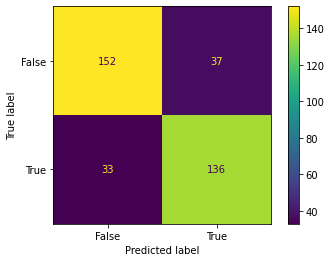

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### **Specificity and Sensitivity**

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitifivity = tp / (tp+fn)

print('specificity: {0:.2f}%'.format(specificity * 100))
print('sensitivity: {0:.2f}%'.format(sensitifivity * 100))
print('Summation of sensitivity and specificity: {0:.2f}'.format(specificity + sensitifivity))

specificity: 80.42%
sensitivity: 80.47%
Summation of sensitivity and specificity: 1.61


#### **Accuracy**

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: {0:.2f}%'.format(accuracy * 100))

accuracy: 80.45%


# **Indvisual test**

In [ ]:
columns = ['BMXWT', 'BMXHT', 'MGXH1T1', 'MGXH2T1', 'MGXH1T2', 'MGXH2T2', 'MGXH1T3', 'MGXH2T3', 'MGDCGSZ', 'RIAGENDR', 'RIDAGEYR']
arr = []
for i in columns:
  val = float(input(f"{i}: "))
  arr = arr + [val]
test = pd.DataFrame([arr], columns=columns)
e = lr.predict(test)
(e-BMD_mean)/BMD_std